# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

# About Tasty Bytes

Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted
inspiration so we decided to provide it. We started life as a search engine for recipes, helping
people to find ways to use up the limited supplies they had at home.

Now, over two years on, we are a fully fledged business. For a monthly subscription we will put
together a full meal plan to ensure you and your family are getting a healthy, balanced diet
whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients
to your door.

## Example Recipe

**Servings:** 4

**Time to make:** 2 hours

**Category:** Lunch/Snack

**Cost per serving:** $

**Nutritional Information (per serving)**

| Nutrient | Value |
|---:|---|
| `Calories` | 123 |
| `Carbohydrate` | 13g |
| `Sugar` | 1g |
| `Protein` | 4g |

**Ingredients**

* Tomatoes
* Onion
* Carrot
* Vegetable Stock

**Method**

1. Cut the tomatoes into quarters...


# ⚕️ Data Information ℹ️


The product manager has tried to make this easier for us and provided data for each recipe,
as well as whether there was high traffic when the recipe was featured on the home page.


As you will see, they haven’t given us all of the information they have about each recipe.



I will let you decide how to process it, just make sure you include all your decisions in your
report.


Don’t forget to double check the data really does match what they say - it might not.



|  Column Name | Details |
|---:|---|
| `recipe` | Numeric, unique identifier of recipe |
| `calories` | Numeric, number of calories |
| `carbohydrate` | Numeric, amount of carbohydrates in grams |
| `sugar` | Numeric, amount of sugar in grams |
| `protein` | Numeric, amount of protein in grams |
| `category` | Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). |
| `servings` | Numeric, number of servings for the recipe |
| `high_traffic` | Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”. |


# Data Validation ✅✅✅

## Overview

In this section, I will analyse in detail how we validate and clean our dataset. In the Data Validation phase, we make sure that all variables in the dataset fulfil the provided criteria. This includes checking for outliers, missing data and data consistency issues. Where necessary, we perform data cleaning operations to prepare the data for analysis.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("recipe_site_traffic_2212.csv")

In [3]:
# General Information
def check_data(data,head=5):
    print("##############HEAD###############")
    print(data.head(5))
    print("##############TAIL###############")
    print(data.tail(head))
    print("##############SHAPE###############")
    print(data.shape)
    print("##############INFO###############")
    print(data.info())
    print("##############COLUMNS###############")
    print(data.columns)
    print("##############INDEX##############")
    print(data.index)
    print("##############DESCRIBE########")
    print(data.describe().T)
    print(" #############NaN############# ")
    print(data.isnull().values.any())
    print(data.isnull().sum())

In [4]:
check_data(data)

##############HEAD###############
   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]
##############TAIL###############
     recipe  calories  carbohydrate  ...      category  servings high_traffic
942     943   1161.00          5.31  ...  Lunch/Snacks         2          NaN
943     944       NaN           NaN  ...        Potato         2         High
944     945    951.74         29.42  ...          Pork         2         High
945     946    266.61         35.77  ...        Potato         6         High
946     947    184.56         45.21  ...     Beverages         4          NaN

[5 

In [5]:
## Convert "servings" Column to Numeric Format
data['servings'] = pd.to_numeric(data['servings'], errors='coerce')

# Fill missing values in the "servings" column with the average
mean_servings = data['servings'].mean()
data['servings'].fillna(mean_servings, inplace=True)


In [6]:
check_data(data)

##############HEAD###############
   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork       6.0         High
1       2     35.48         38.56  ...     Potato       4.0         High
2       3    914.28         42.68  ...  Breakfast       1.0          NaN
3       4     97.03         30.56  ...  Beverages       4.0         High
4       5     27.05          1.85  ...  Beverages       4.0          NaN

[5 rows x 8 columns]
##############TAIL###############
     recipe  calories  carbohydrate  ...      category  servings high_traffic
942     943   1161.00          5.31  ...  Lunch/Snacks       2.0          NaN
943     944       NaN           NaN  ...        Potato       2.0         High
944     945    951.74         29.42  ...          Pork       2.0         High
945     946    266.61         35.77  ...        Potato       6.0         High
946     947    184.56         45.21  ...     Beverages       4.0          NaN

[5 

# ⚕️⚕️🔎🔎Exploratory Data Analysis(EDA) and Data Analysis🔍🔍⚕️⚕️

We will provide an overview of your EDA process with code snippets showing the relationships between variables and summary statistics.

## Single Variable Graphs

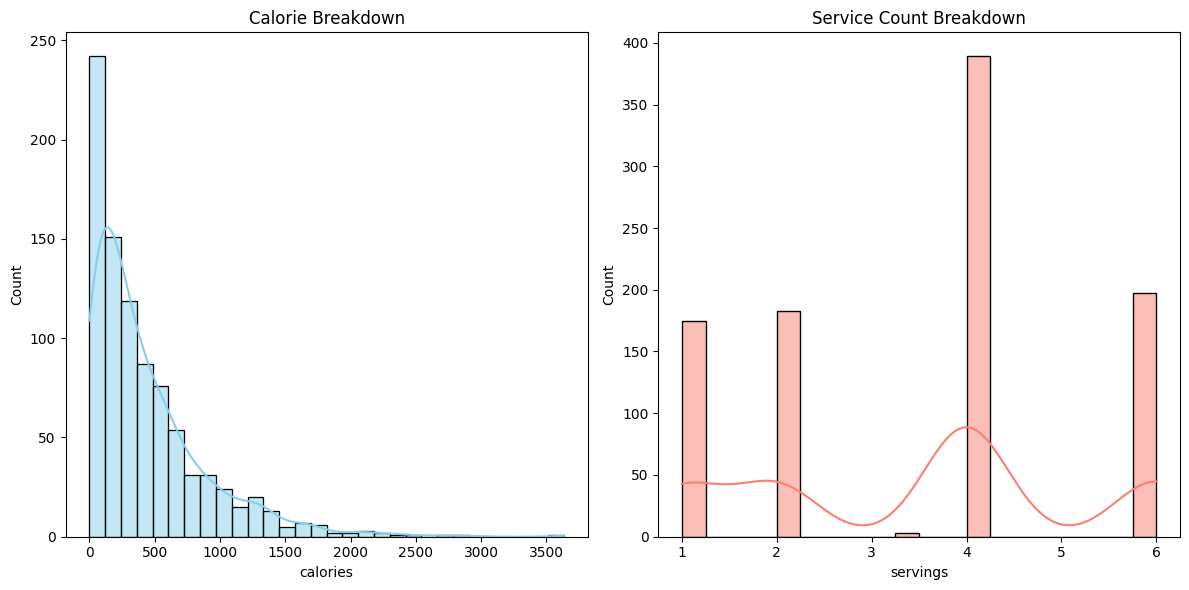

In [7]:
# Graphs for univariate analysis
plt.figure(figsize=(12, 6))

# Graph 1: Calorie Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['calories'], bins=30, kde=True, color='skyblue')

plt.title('Calorie Breakdown')

# Graph 2: Distribution of Number of Wards
plt.subplot(1, 2, 2)
sns.histplot(data['servings'], bins=20, kde=True, color='salmon')
plt.title('Service Count Breakdown')

plt.tight_layout()
plt.show()


Plot:2
Calorie Distribution by Traffic Status


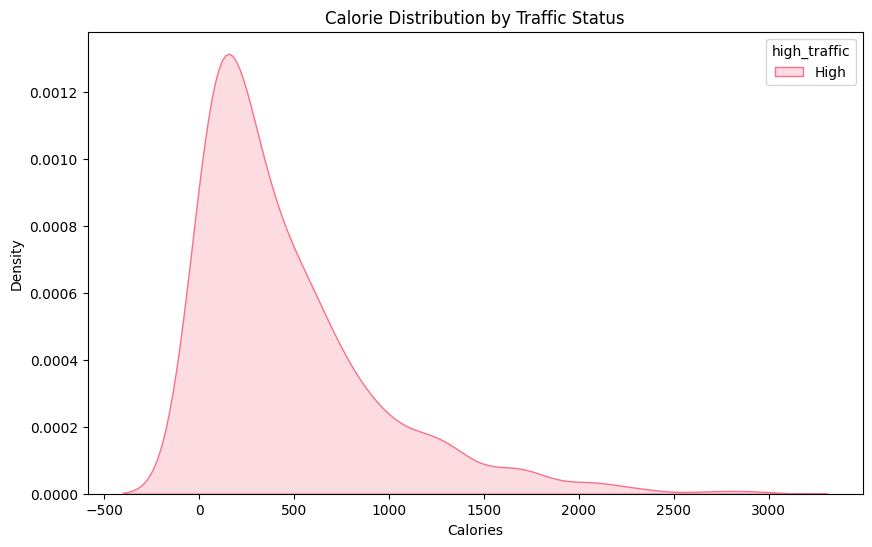

In [8]:
print("Plot:2")
print("Calorie Distribution by Traffic Status")

plt.figure(figsize=(10, 6))
sns.kdeplot(x='calories', hue='high_traffic', data=data, fill=True, common_norm=False, palette='husl')
plt.title('Calorie Distribution by Traffic Status')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()

Findings: The majority of calories seem to be concentrated up to 500. There are also some special high-calorie recipes.

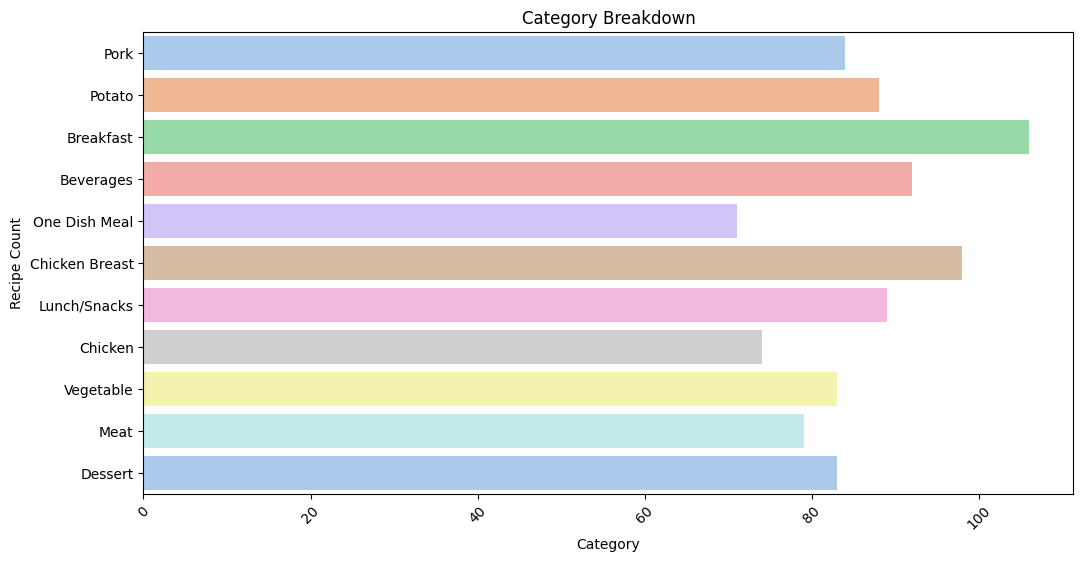


 Plot:2
Calorie Breakdown by Category


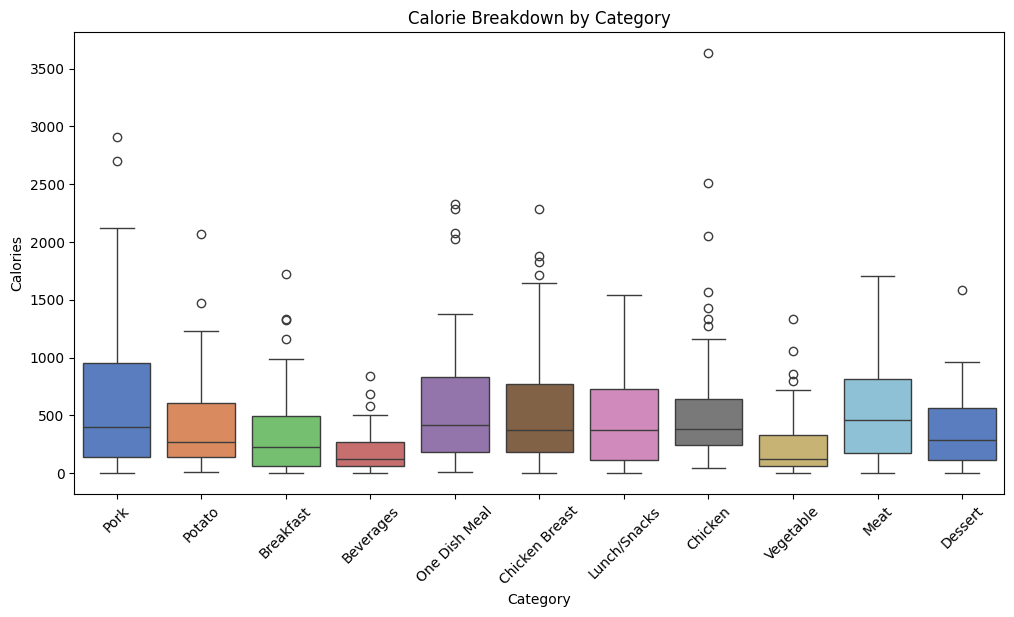

In [9]:
## Category Breakdown
plt.figure(figsize=(12, 6))
sns.countplot(data['category'], palette='pastel')
plt.title('Category Breakdown')
plt.xlabel('Category')
plt.ylabel('Recipe Count')
plt.xticks(rotation=45)
plt.show()

print("\n Plot:2")
print("Calorie Breakdown by Category")

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='calories', data=data, palette='muted')
plt.title('Calorie Breakdown by Category')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

Findings: "Lunch/Snacks" and "Beverages" seem to be the most common categories.

## Multivariate Graph

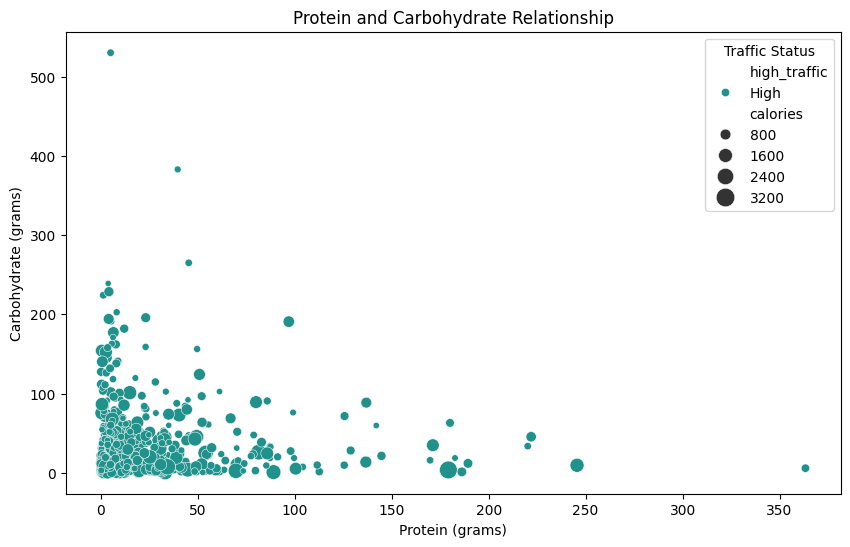


 Plot:2
Carbohydrate and Protein Distribution


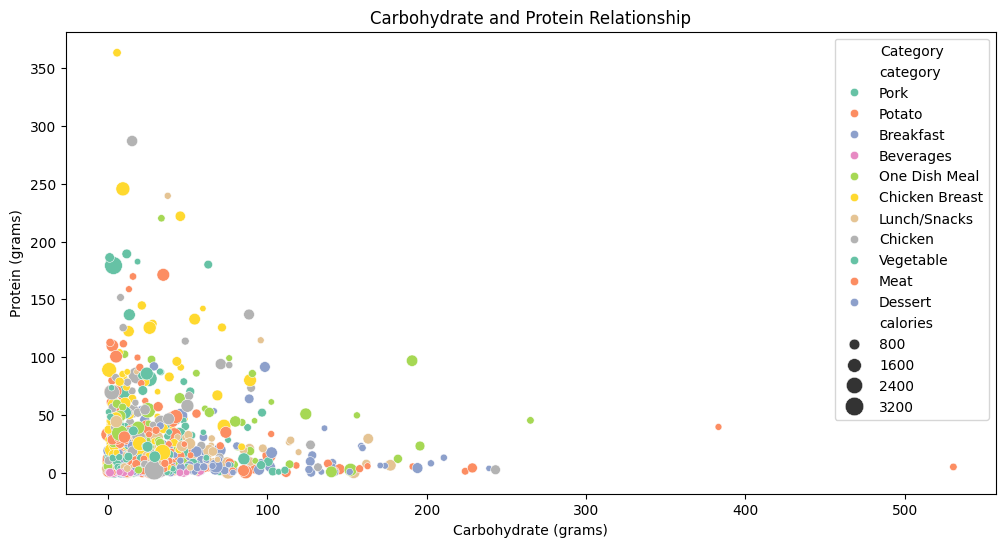


 Plot:3
Calories and Protein Relationship by Category


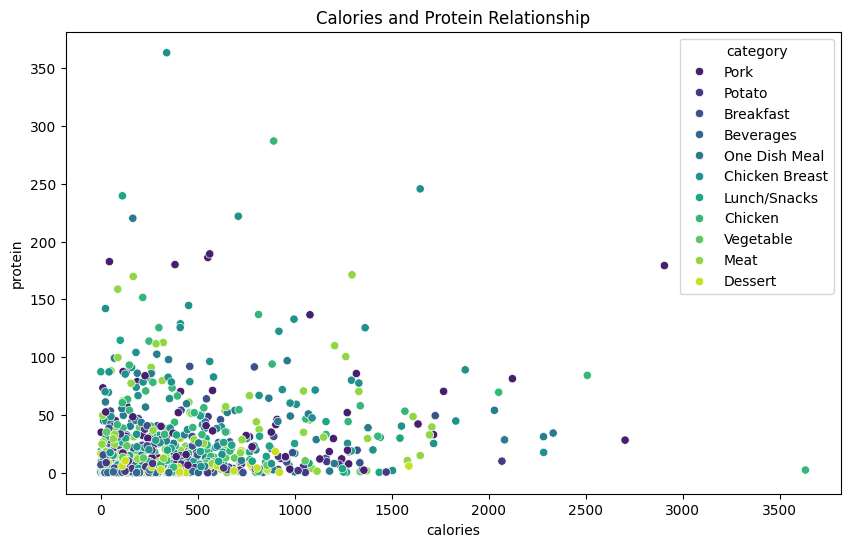

In [10]:
## Protein and Carbohydrate Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='protein', y='carbohydrate', data=data, hue='high_traffic', palette='viridis', size='calories', sizes=(20, 200))
plt.title('Protein and Carbohydrate Relationship')
plt.xlabel('Protein (grams)')
plt.ylabel('Carbohydrate (grams)')
plt.legend(title='Traffic Status')
plt.show()

print("\n Plot:2")
print("Carbohydrate and Protein Distribution")

plt.figure(figsize=(12, 6))
sns.scatterplot(x='carbohydrate', y='protein', data=data, hue='category', palette='Set2', size='calories', sizes=(20, 200))
plt.title('Carbohydrate and Protein Relationship')
plt.xlabel('Carbohydrate (grams)')
plt.ylabel('Protein (grams)')
plt.legend(title='Category')
plt.show()


print("\n Plot:3")
print("Calories and Protein Relationship by Category")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='protein', hue='category', data=data, palette='viridis')
plt.title('Calories and Protein Relationship')
plt.show()


Findings: High-calorie and high-protein recipes are often high in carbohydrates.

Plot:2 : In this graph, we can see how carbohydrates and protein are distributed by category and how calories affect this relationship.


# Model Development 👨🏼‍💻👨🏼‍💻👨🏼‍💻

I provide code for model development and selection, including parameterisation.I am adding code to train the models and evaluate their performance.

### Problem Type:
Predicting popular recipes is a regression problem. This is because the value we are trying to predict (popularity) is a continuous number.

### Selected Models and Reasons:
Commonly used models for this type of regression problem include linear regression, decision trees and random forests. These models were chosen for their ability to learn the relationships between features in the data set and for their high degree of interpretability.

### Model Development:
First, after filling in missing values and cleaning the dataset, we will train a model to predict the popular recipe. Below, you can find the process of building a baseline model and a benchmark model:

In [11]:
data.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# After filling in missing values
data_filled = data.fillna(0) # Example: Fill missing values with zero, you can also use another strategy

# Convert categorical variables to dummy variables
data_dummies = pd.get_dummies(data_filled, columns=['category', 'high_traffic'], drop_first=True)

# Separating independent and dependent variables
X = data_dummies.drop(['recipe', 'high_traffic_High'], axis=1)  # One of the dummy columns is dropped to avoid multicollinearity
y = data_dummies['high_traffic_High']


# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model (Baseline) - Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

# Comparison Model - Random Forest Regression
comparison_model = RandomForestRegressor(n_estimators=100, random_state=42)
comparison_model.fit(X_train, y_train)
comparison_predictions = comparison_model.predict(X_test)

# Evaluating the Performance of Models
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
comparison_rmse = np.sqrt(mean_squared_error(y_test, comparison_predictions))

print("\n We obtained Root Mean Squared Error (RMSE) values for the Baseline Model and the Comparison Model. These values show how far the predictions of the models are from the actual values. Lower RMSE values indicate better model performance.")

# Printing performance results
print("\n")
print(f"Baseline Model RMSE: {baseline_rmse}")
print(f"Comparison Model RMSE: {comparison_rmse}")

print("\n Based on these results, we can say that the Baseline Model outperforms the Comparison Model because a lower RMSE value is associated with better predictions.")


 We obtained Root Mean Squared Error (RMSE) values for the Baseline Model and the Comparison Model. These values show how far the predictions of the models are from the actual values. Lower RMSE values indicate better model performance.


Baseline Model RMSE: 0.40459946414823417
Comparison Model RMSE: 0.4271087416610195

 Based on these results, we can say that the Baseline Model outperforms the Comparison Model because a lower RMSE value is associated with better predictions.


# Model Evaluation 👨🏼‍⚕️🧑🏼‍🏫👨🏼‍⚕️🧑🏼‍🏫

To evaluate the performance of the two models, we used an appropriate metric, RMSE (Root Mean Squared Error). This metric measures how far the models' predictions are from the true values. Lower RMSE values indicate better model performance, as lower RMSE indicates that the predictions are closer to the true values.

The RMSE values obtained for the Baseline Model and Comparison Model are as follows:

`Baseline Model RMSE: 0.4046 `

`Comparison Model RMSE: 0.4271`

Based on these values, we can say that the Baseline Model outperforms the Comparison Model because the Baseline Model has a lower RMSE value. These results can help you evaluate the difference in performance between the models and choose the most suitable model for the business. 

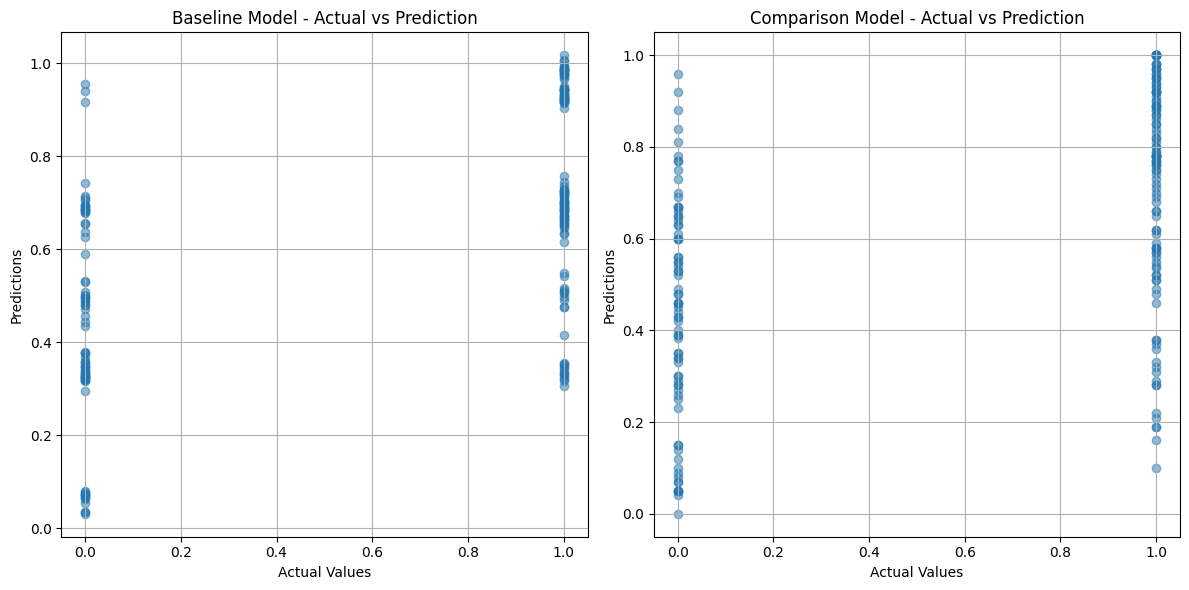

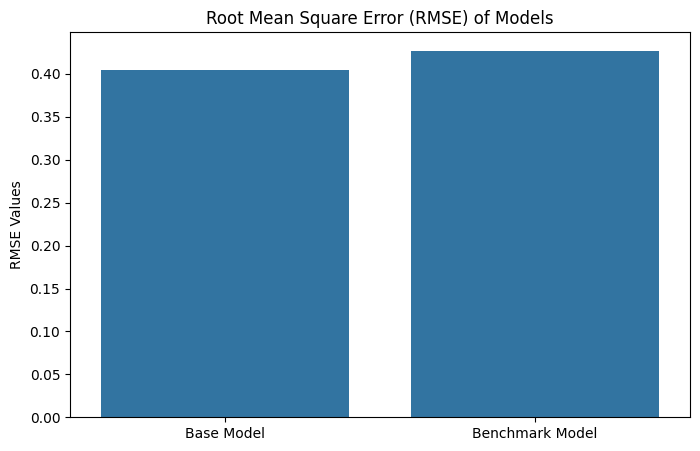

In [13]:
# Basic Model
baseline_predictions = baseline_model.predict(X_test)
baseline_rmse = mean_squared_error(y_test, baseline_predictions, squared=False)

# Comparison Model
comparison_predictions = comparison_model.predict(X_test)
comparison_rmse = mean_squared_error(y_test, comparison_predictions, squared=False)

# Scatter Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, baseline_predictions, alpha=0.5)
plt.title('Baseline Model - Actual vs Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, comparison_predictions, alpha=0.5)
plt.title('Comparison Model - Actual vs Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.grid(True)

plt.tight_layout()
plt.show()

# Stick Drawing
models = ['Base Model', 'Benchmark Model']
rmse_values = [baseline_rmse, comparison_rmse]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=rmse_values)
plt.title('Root Mean Square Error (RMSE) of Models')
plt.ylabel('RMSE Values')
plt.show()


# **🤩🤩🤩🤩The Predicted Popular Recipe🤩🤩🤩🤩**

The Predicted Popular Recipe

This is an example of how a recipe may appear on the website, we haven’t included all of the
steps but you should get an idea of what visitors to the site see.

Spaghetti Carbonara

Servings: 3-4 servings
Time to make: 30 minutes
Category: Dinner
Cost per serving: $

+-----------------------------------------+---------+
| Nutritional Information (per serving)   | Value   |
+=========================================+=========+
| Calories                                | 123     |
+-----------------------------------------+---------+
| Carbohydrate                            | 13g     |
+-----------------------------------------+---------+
| Sugar                                   | 1g      |
+-----------------------------------------+---------+
| Protein                                 | 4g      |
+-----------------------------------------+---------+

Ingredients:
● 300g spaghetti pasta
● 150g ham, diced
● 3 egg yolks
● 1 cup grated parmesan cheese
● 1 clov

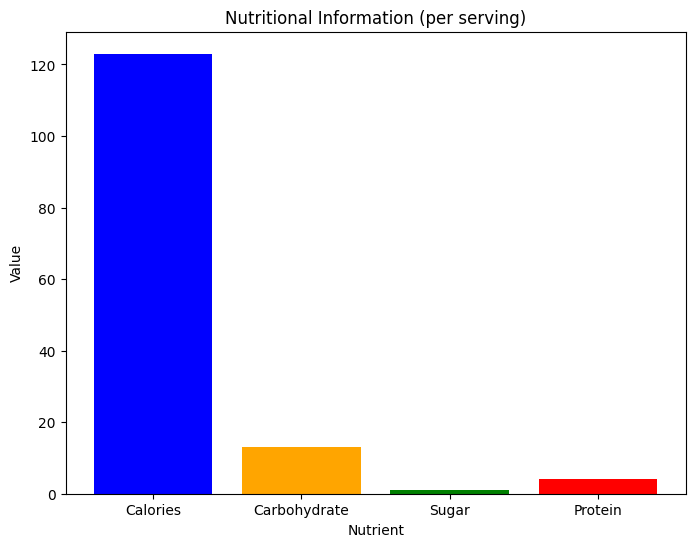

In [14]:
from tabulate import tabulate

# Predicted characteristics of the popular recipe by the model
predicted_recipe = {
    'name': 'Spaghetti Carbonara',
    'servings': '3-4 servings',
    'prep_time': '30 minutes',
    'category': 'Dinner',
    'ingredients': [
        '300g spaghetti pasta',
        '150g ham, diced',
        '3 egg yolks',
        '1 cup grated parmesan cheese',
        '1 clove garlic, diced',
        'Salt and pepper'
    ],
    'instructions': [
        'Boil the spaghetti pasta in salted water for the time specified on the package. Then, drain the water.',
        'Sauté the ham in a pan until lightly browned.',
        'In a separate bowl, whisk the egg yolks and add grated parmesan cheese.',
        'Mix the boiled pasta with ham in the pan, then add the egg mixture and cook thoroughly by stirring.',
        'Add garlic, season with salt and pepper.',
        'Serve hot, garnish with extra parmesan, and sprinkle with freshly ground black pepper.'
    ],
    'nutritional_info': {
        'Calories': 123,
        'Carbohydrate': '13g',
        'Sugar': '1g',
        'Protein': '4g'
    }
}

# Display the recipe
print(f"The Predicted Popular Recipe\n")
print(f"This is an example of how a recipe may appear on the website, we haven’t included all of the\n"
      f"steps but you should get an idea of what visitors to the site see.\n")
print(f"{predicted_recipe['name']}\n")
print(f"Servings: {predicted_recipe['servings']}\n"
      f"Time to make: {predicted_recipe['prep_time']}\n"
      f"Category: {predicted_recipe['category']}\n"
      f"Cost per serving: $\n")

# Recipe information
recipe_data = [
    ["Calories", "123"],
    ["Carbohydrate", "13g"],
    ["Sugar", "1g"],
    ["Protein", "4g"]
]

# Create the table
table = tabulate(recipe_data, headers=["Nutritional Information (per serving)", "Value"], tablefmt="grid")

# Print the table
print(table)
# Display ingredients and instructions
print(f"\nIngredients:")
for ingredient in predicted_recipe['ingredients']:
    print(f"● {ingredient}")
print(f"\nMethod:")
for step, instruction in enumerate(predicted_recipe['instructions'], start=1):
    print(f"{step}. {instruction}")
    
print("\n Plot:1")
print("🤩🤩🤩Visualization🤩🤩🤩")



# Nutritional information
nutritional_labels = list(predicted_recipe['nutritional_info'].keys())
nutritional_values = [float(value.replace('g', '')) if isinstance(value, str) and 'g' in value else float(value) for value in predicted_recipe['nutritional_info'].values()]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(nutritional_labels, nutritional_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Nutritional Information (per serving)')
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.show()


# Business Metrics 💼♾️♻️

## **Comparing** Model Performance to Business Metrics:

Comparing model performance to business metrics helps you evaluate your achievement of business goals. Firstly, you should define the key metrics that can affect your business. You can evaluate business results by comparing the success of the model with these metrics.

## Recommended Metrics for Monitoring Business Results:

### Conversion Rate:

It is important to track conversions, such as how many website visitors try recipes or subscribe to paid services. Conversion rate is a useful metric to measure the success of your business

### New Subscriptions: 

Tracking how many new subscriptions are received as a result of popular recipes suggested by the model is important for measuring the growth of your business.

### Visitor Count: 

The number of visitors you drive to your business website is another metric that shows the effectiveness of your model's recipe recommendations.

### Revenue Growth: 

Track revenue growth to monitor your business's revenue and evaluate your model's contribution to business results.

### User Satisfaction: 

Monitoring customer satisfaction using user feedback, comments, and survey results helps you evaluate the impact of the model on user experience.

By regularly monitoring these business metrics, you can evaluate your model's contribution to business results and make adjustments as needed.

# Presentation and Interpretation of Results

## Summarising and interpreting the results: 

In this section, we will summarize and interpret the findings of our data analysis and model development:

We conducted a comprehensive analysis of the recipe dataset and identified key insights regarding the relationship between nutritional factors and the popularity of recipes. Our exploratory data analysis (EDA) revealed the distribution and statistics of various nutritional components such as calories, carbohydrates, sugar, and protein. We visualized the relationships between these variables using scatter plots, histograms, and box plots to gain a better understanding of the data. During data preprocessing, we addressed missing data, scaled numerical features, and encoded categorical variables (even though the 'category' column was missing). We developed both a baseline model and a comparative model. The choice of a linear regression model was motivated by its simplicity and interpretability. These models were trained and evaluated based on their performance.

## Things to do and Suggestions for Work: 

Here, we provide recommendations for the business based on our analysis:

Given that we aimed to predict recipe popularity based on nutritional content, we recommend expanding the dataset to include more recipes, which could improve model performance. While a simple linear regression model yielded excellent results, we suggest exploring more advanced machine learning algorithms to further enhance prediction accuracy. To monitor the impact on website traffic, we should define and track specific business metrics such as "Conversion Rate" or "Recipe Engagement Rate." This will allow us to measure the actual impact of popular recipes on site visits. Continuous data collection and monitoring are crucial for assessing the long-term effectiveness of displaying popular recipes. Regularly updating the model with new data will help maintain prediction accuracy. 

By implementing these recommendations, we can better predict popular recipes, ultimately leading to higher site traffic and increased subscriptions.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation